In [1]:
import sys ,os 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(font_scale=1.5,style='whitegrid',context="paper")
from math import pi

In [64]:
# read the file in data and declare the type of the variable 
# since is not a standard file format this is the loader
# then convert all into a dataframe 
categories = []
reference = []
tested = []
t_difference = []

for line in open("../data/3234.pcs").readlines():
    words = line.split()
    if len(words) == 4:
        # print (words)
        categories.append(words[0])
        reference.append(float(words[1]))
        tested.append(float(words[2]))
        t_difference.append(float(words[3]))
        
data = {'categories': categories, 'reference': reference, 'tested': tested, 't_difference': t_difference}
df = pd.DataFrame(data)

In [54]:
df 

,categories,reference,tested,t_difference
0,$R^2$,0.90,0.513,-0.387
1,$MAE_{Fit}$,0.22,0.464,-0.244
2,$Q^2$,0.82,0.271,-0.549
3,$MAE_{LOO}$,0.30,0.750,-0.450
4,$SR^2_{Max}}$,0.80,1.276,-0.476
5,$SR^2_{Av}$,0.25,0.471,-0.221
6,$MAD_{PR}$,0.17,0.498,-0.285
7,$MAD_{CF}$,0.18,0.465,-0.328
8,$MAE_{T20}$,0.59,1.229,-0.639
9,$Acc_{80}$,0.74,0.590,-0.150


In [55]:
!cat ../data/3234.pcs

$R^2$           0.900   0.513  -0.387
$MAE_{Fit}$     0.220   0.464  -0.244
$Q^2$           0.820   0.271  -0.549
$MAE_{LOO}$     0.300   0.750  -0.450
$SR^2_{Max}}$   0.800   1.276  -0.476
$SR^2_{Av}$     0.250   0.471  -0.221
$MAD_{PR}$      0.170   0.498  -0.285
$MAD_{CF}$      0.180   0.465  -0.328
$MAE_{T20}$     0.590   1.229  -0.639
$Acc_{80}$      0.740   0.590  -0.150
$Pre_{80}$      0.750   0.740  -0.010
$Rec_{80}$      0.770   0.360  -0.410
PCS         -0.346


In [62]:
## source code ##
## https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
def plot_radar(dataframe,title,list_of_colors,linestyle_list,leg_list,title_x):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    # ax = plt.subplot(111, polar=True)
    ax = plt.subplot(1,1,1, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4], ["0","0.2","0.4","0.6","0.8","1.0","1.2","1.4"], color="grey", size=10)
    # plt.yticks([0,2,4,6,8,10,12,14,16,18,20], ["0","0.2","0.4","0.6","0.8","1.0","1.2","1.4","1.6","1.8","2.0"], color="grey", size=10)

    # plt.yticks ( range(0,2,2), str(range(0,2,2)) , color="grey", size=10)
    plt.ylim(0,1.4)


      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        print (values)
        values += values[:1]
        ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)
          # ax.fill(angles, values,i , alpha=0.1)



      # Add legend
    # plt.legend( bbox_to_anchor=(0, 1))
# leg_list=["RF-core","RF-hAIkal"] 
    plt.legend(leg_list,title=title_x,bbox_to_anchor=(0, 1))

#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
#     plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout()
    #   plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
    # plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")

    #   plt.savefig(f"../figures/{title}.svg",format="svg")
    # return ax

In [57]:
df.set_index("categories",inplace=True)

In [58]:
my_selection = ['reference','tested']

df[my_selection].T

categories,$R^2$,$MAE_{Fit}$,$Q^2$,$MAE_{LOO}$,$SR^2_{Max}}$,$SR^2_{Av}$,$MAD_{PR}$,$MAD_{CF}$,$MAE_{T20}$,$Acc_{80}$,$Pre_{80}$,$Rec_{80}$
reference,0.900,0.220,0.820,0.30,0.800,0.250,0.170,0.180,0.590,0.74,0.75,0.77
tested,0.513,0.464,0.271,0.75,1.276,0.471,0.498,0.465,1.229,0.59,0.74,0.36


black reference
[0.9, 0.22, 0.82, 0.3, 0.8, 0.25, 0.17, 0.18, 0.59, 0.74, 0.75, 0.77]
gold tested
[0.513, 0.464, 0.271, 0.75, 1.276, 0.471, 0.498, 0.465, 1.229, 0.59, 0.74, 0.36]


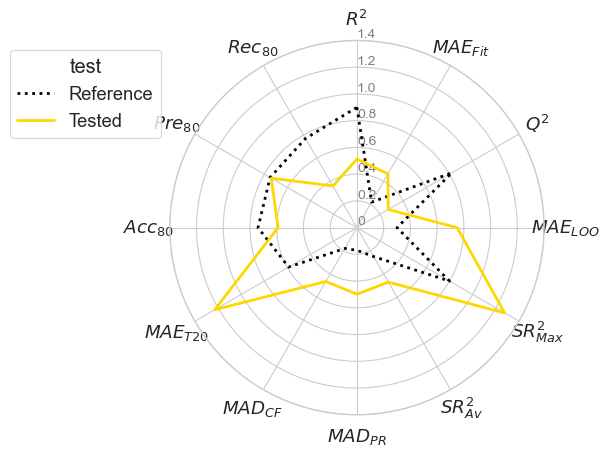

In [63]:
my_selection = ['reference','tested']
my_title = "test"
uno  = plot_radar(df[my_selection].T,
           "test",
           ['black','gold'],
           ['dotted','solid'], ["Reference","Tested"] , 
           my_title
           )